# EJERCICIO CON RECUPERACIÓN DE CALOR

## $\color {red} {NOTA:}$ $\color {red} { CORRER}$ $\color {red} { TODO}$ $\color {red} { EL}$ $\color {red} { CÓDIGO}$ $\color {red} { Y}$ $\color {red} {DESPUÉS}$ $\color {red} {OBSERVAR}$ $\color {red} {LOS}$ $\color {red} {RESULATOS}$

# Importación de librerías

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display # Permite visualizar un widget
import ipywidgets as ipw
from ipywidgets import interact, widgets

# Valores iniciales del problema

In [2]:
deltax = 12.5 * 10**-2     #[m]
deltay = 21.65075 * 10**-2 #[m]
L = 10                     #[m]
h = (150*1.3)              #[W/m^2-K]
k = 41                     #[W/m-K]
cp = 434                   #[J/kg/K]
rho = 8131                 #[kg/m^3]
a = 100                    #[cm]
b = 2*a                    #[cm]
alpha = 0.5                #Absortividad
sigma = 5.67 * (10**-8)    #[W/m^2-K^4]
tinf = (1548 + 273.15)     #[°K]
talrd = (1548 + 273.15)    #[°K]
tini = (60 + 273.15)       #[°K]    
dif = k/(rho*cp)           #[m^2/s]
Iteraciones = 131
ang = 60*(np.pi/180)       #[rad]

# Vamos a determinar el tiempo para cumplir con todos los criterios de estabilidad
## Primero vamos a calcular el valor de $\tau$ que cumpla para todos los criterios de estabilidad
## Sistema sometido a radiación y convección de los alrededores

In [3]:
#Nodo A
lista_tao = []
lista_tao.append((1/(2*(1+((h*deltax**2)/k*deltay)+((deltax**2)/(deltay**2))))))
#Nodo B,C,D
lista_tao.append((1/(2*(1+((h*deltax**2)/k*deltay)+((deltax**2)/(deltay**2))))))
#Nodo E
lista_tao.append((1/((4/3)+(((4/3)*h*deltax**2)/k*deltay)+(((8/3)*(deltax**2))/(deltay**2)))))
#Nodo F,L,S
lista_tao.append((1/(((deltax**2)/(deltay**2))+1)))
#Nodo G
lista_tao.append((1/(2+(2*(deltax**2)/(deltay**2)))))
#Nodo K,R,Z
lista_tao.append((1/(2+(2*(deltax**2)/(deltay**2)))))
#Nodo AA
#Calculamos la constante respectiva
C = ((talrd**2)+(60**2))*(talrd+60)
lista_tao.append((1/((2)+(((2)*h*deltax**2)/k*deltay)+(((2)*(deltax**2))/(deltay**2))+((2*C*(deltax**2)*sigma*alpha)/(deltay*k)))))
#Nodo AB
lista_tao.append((1/((2)+(((2)*h*deltax**2)/k*deltay)+(((2)*(deltax**2))/(deltay**2))+((2*C*(deltax**2)*sigma*alpha)/(deltay*k)))))
#Nodo AI
lista_tao.append((1/((4)+(((4)*h*deltax**2)/k*deltay)+((4*C*(deltax**2)*sigma*alpha)/(deltay*k)))))

## Sistema sin estar sometido a radiación ni convección

In [4]:
#Nodo E
lista_tao.append(1/((4/3)+(((8*(deltax**2))/(3*deltay)))+(((4*(deltax))/(3*deltay*(np.cos(np.pi/3)))))+(((4*h*(deltax**2))/(3*k*deltay)))))
#Nodo R
lista_tao.append(1/((2)+(((2*(deltax**2))/(deltay**2)))+(((2*(deltax))/(deltay*(np.cos(np.pi/3)))))))
#Nodo AI
lista_tao.append((1/(4+(4*(deltax)/(deltay*(np.cos((np.pi)/3)))))))
#Nodo AE
lista_tao.append((1/(2+(2*(deltax**2)/(deltay**2)))))
#Nodo AA
lista_tao.append((1/(2+(2*(deltax**2)/(deltay**2)))))
#Escogemos el valor de tao que cumpla para todos los criterios de estabilidad
tao_ini = min(lista_tao)
print(min(lista_tao))
print(lista_tao)

0.11602573377705612
[0.3705297423956967, 0.3705297423956967, 0.445699233971641, 0.7500019902091561, 0.37500099510457807, 0.37500099510457807, 0.30100634044879787, 0.30100634044879787, 0.18828636161819587, 0.2838467185953318, 0.20096267509431245, 0.11602573377705612, 0.37500099510457807, 0.37500099510457807]


# Calculamos el $\Delta$t

In [5]:
delta_t = (tao_ini * (deltax**2))/dif  #[s]
print(delta_t)

156.03577543525137


# Ahora vamos a escoger un valor menor a este  $\Delta$ t calculado con el $\tau$ inicial para efectivamente cumplir con todos los criterios de estabilidad; y también recalculamos el valor de $\tau$ 

In [6]:
deltat = 150 #[s]
tao = (dif*deltat)/(deltax**2)
print(tao)

0.11153762666293364


# Mapa de calor
## Parte del sistema sometida a radiación y convección
### Ecuaciones para calcular la temperatura de cada nodo en el futuro dependiendo de las temperaturas del pasado y de la temperatura de los nodos adyacentes

In [7]:
def function(Iteraciones):
    temperaturas = []
    temp_ini = np.full((5,9),0)
    temp_ini
    for i in range(0,5):
        for j in range(0,9):
            temp_ini[i,j] = tini
        
    for i in range(5,9):
        temp_ini[0,i] = 0
    for i in range(6,9):
        temp_ini[1,i] = 0
    for i in range(7,9):
        temp_ini[2,i] = 0
    temp_ini[3,8] = 0
    temperaturas.insert(0,temp_ini)

    for m in range(0,Iteraciones):

        #Avanzamos 150 segundos por iteración
        temp_prima = np.full((5,9),0)
        #Nodo A
        temp_prima[0,0] = ((temperaturas[m][0,0])*(1-(2*tao)-((2*tao*h*deltax**2)/k*deltay)-((2*tao*(deltax**2))/(deltay**2)))) + ((2*tao)*(temperaturas[m][0,1]+((tinf*h*(deltax**2))/(k*deltay))+(temperaturas[m][1,0]*((deltax**2)/(deltay**2)))))
        #Nodos B,C,D
        for i in range(0,3):
            temp_prima[0,(i+1)] = (temperaturas[m][0,(i+1)]*(1-(2*tao)-((2*tao*h*deltax**2)/k*deltay)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][0,i]+((2*tinf*h*(deltax**2))/(k*deltay))+(2*temperaturas[m][1,(i+1)]*((deltax**2)/(deltay**2)))+temperaturas[m][0,(i+2)]))
        #Nodo E
        temp_prima[0,4] = (temperaturas[m][0,4]*(1-((4/3)*tao)-(((4/3)*tao*h*deltax**2)/k)-(((8/3)*tao*(deltax**2))/(deltay**2)))) + (((4/3)*tao)*(temperaturas[m][0,3]+((tinf*h*(deltax**2))/(k))+(2*temperaturas[m][1,4]*((deltax**2)/(deltay**2)))))
        #Nodos F,L,S
        for i in range(0,3):
            temp_prima[(i+1),0] = (temperaturas[m][(i+1),0]*(1-tao-((tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][(i+1),1]+(temperaturas[m][i,0]*((deltax**2)/(2*(deltay**2))))+(temperaturas[m][(i+2),0]*((deltax**2)/(2*(deltay**2))))))
        #Nodos G,H,I,J
        for i in range(0,4):
            temp_prima[1,(i+1)] = (temperaturas[m][1,(i+1)]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][1,i] + temperaturas[m][1,(i+2)]+((temperaturas[m][0,(i+1)]+temperaturas[m][2,(i+1)])*((deltax**2)/(deltay**2)))))
        #Nodos M,N,O,P,Q
        for i in range(0,5):
            temp_prima[2,(i+1)] = (temperaturas[m][2,(i+1)]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][2,i] + temperaturas[m][2,(i+2)]+((temperaturas[m][1,(i+1)]+temperaturas[m][3,(i+1)])*((deltax**2)/(deltay**2)))))
        #Nodos T,U,V,W,X,Y
        for i in range(0,6):
            temp_prima[3,(i+1)] = (temperaturas[m][3,(i+1)]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][3,i] + temperaturas[m][3,(i+2)]+((temperaturas[m][2,(i+1)]+temperaturas[m][4,(i+1)])*((deltax**2)/(deltay**2)))))
        #Nodo K
        temp_prima[1,5] = (temperaturas[m][1,5]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + ((2*tao)*(temperaturas[m][1,4]+(temperaturas[m][2,5]*((deltax**2)/(deltay**2)))))
        #Nodo R
        temp_prima[2,6] = (temperaturas[m][2,6]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + ((2*tao)*(temperaturas[m][2,5]+(temperaturas[m][3,6]*((deltax**2)/(deltay**2)))))
        #Nodo Z
        temp_prima[3,7] = (temperaturas[m][3,7]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + ((2*tao)*(temperaturas[m][3,6]+(temperaturas[m][4,7]*((deltax**2)/(deltay**2)))))
        #Nodo AA
        temp_prima[4,0] = (temperaturas[m][4,0]) + ((2*tao)*((((deltax**2)*(temperaturas[m][3,0]-temperaturas[m][4,0]))/(deltay**2)) + (temperaturas[m][4,1]-temperaturas[m][4,0]) + (((tinf-temperaturas[m][4,0])*h*(deltax**2))/(k*deltay)) + ((((talrd**4)-(temperaturas[m][4,0]**4))*alpha*sigma*(deltax**2))/(k*deltay))))      
        #Nodo AB,AC,AD,AE,AF,AG,AH
        for i in range(0,7):
            temp_prima[4,i+1] = (temperaturas[m][4,i+1]) + (tao*((((deltax**2)*2*(temperaturas[m][3,i+1]-temperaturas[m][4,i+1]))/(deltay**2)) + (temperaturas[m][4,i]-temperaturas[m][4,i+1]) + (temperaturas[m][4,i+2]-temperaturas[m][4,i+1]) + (((tinf-temperaturas[m][4,i+1])*2*h*(deltax**2))/(k*deltay)) + ((((talrd**4)-(temperaturas[m][4,i+1]**4))*2*alpha*sigma*(deltax**2))/(k*deltay))))
        #Nodo AI
        temp_prima[4,8] = (temperaturas[m][4,8]) + ((4*tao)*((temperaturas[m][4,7]-temperaturas[m][4,8]) + ((tinf-temperaturas[m][4,8])*h*(deltax**2))/(k*deltay)) + ((((talrd**4)-(temperaturas[m][4,8]**4))*alpha*sigma*(deltax**2))/(k*deltay)))
    
        temperaturas.insert((m+1),temp_prima)
        
    f, ax = plt.subplots(figsize=(10, 8))
    title = 'MAPA DE CALOR\nPIEZA SOMETIDA A RADICIÓN Y CONVECCIÓN\n'
    plt.title(title, loc='left', fontsize=18)
    ax = sns.heatmap(temperaturas[Iteraciones], linewidths=.5, vmin=300, vmax=2000, annot=True, fmt = 'd', cmap = "YlOrBr")
    plt.show()

interact(function,Iteraciones=(0,Iteraciones))


interactive(children=(IntSlider(value=65, description='Iteraciones', max=131), Output()), _dom_classes=('widge…

<function __main__.function(Iteraciones)>

# Mapa de Calor
## Combinación de ambos sistemas; sistema sin radiación y expuesto a superficie adiabática (Parte derecha); sistema con radiación y convección (Parte izquierda); y conducción entre ambos sistemas

In [8]:
def func(Iteraciones):
    temperaturas = []
    temp_ini = np.full((5,17),0)
    temp_ini
    for i in range(0,5):
        for j in range(0,17):
            temp_ini[i,j] = tini
        
    for i in range(5,12):
        temp_ini[0,i] = 0
    for i in range(6,11):
        temp_ini[1,i] = 0
    for i in range(7,10):
        temp_ini[2,i] = 0
    for i in range(8,9):
        temp_ini[3,i] = 0
    temperaturas.insert(0,temp_ini)
    ##print(temp_ini)

    for m in range(0,Iteraciones):

        #Avanzamos 150 segundos por iteración
        temp_prima = np.full((5,17),0)
        #Nodo A
        temp_prima[0,0] = ((temperaturas[m][0,0])*(1-(2*tao)-((2*tao*h*deltax**2)/k*deltay)-((2*tao*(deltax**2))/(deltay**2)))) + ((2*tao)*(temperaturas[m][0,1]+((tinf*h*(deltax**2))/(k*deltay))+(temperaturas[m][1,0]*((deltax**2)/(deltay**2)))))
        #Nodo A'
        temp_prima[0,16] = ((temperaturas[m][0,16])*(1-(2*tao)-((2*tao*h*deltax**2)/k*deltay)-((2*tao*(deltax**2))/(deltay**2)))) + ((2*tao)*(temperaturas[m][0,15]+((tinf*h*(deltax**2))/(k*deltay))+(temperaturas[m][1,16]*((deltax**2)/(deltay**2)))))
        #Nodos B,C,D
        for i in range(0,3):
            temp_prima[0,(i+1)] = (temperaturas[m][0,(i+1)]*(1-(2*tao)-((2*tao*h*deltax**2)/k*deltay)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][0,i]+((2*tinf*h*(deltax**2))/(k*deltay))+(2*temperaturas[m][1,(i+1)]*((deltax**2)/(deltay**2)))+temperaturas[m][0,(i+2)]))
        #Nodos B',C',D'
        for i in range(0,3):
            temp_prima[0,(i+13)] = (temperaturas[m][0,(i+13)]*(1-(2*tao)-((2*tao*h*deltax**2)/k*deltay)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][0,(i+12)]+((2*tinf*h*(deltax**2))/(k*deltay))+(2*temperaturas[m][1,(i+13)]*((deltax**2)/(deltay**2)))+temperaturas[m][0,(i+14)]))
        #Nodo E
        temp_prima[0,4] = (temperaturas[m][0,4]*(1-((4/3)*tao)-(((8/3)*tao*deltax**2)/(deltay))-(((4/3)*tao*deltax)/(np.cos(ang)*deltay))-(((4/3)*tao*h*(deltax**2))/(k*deltay)))) + (((4/3)*tao)*(temperaturas[m][0,3]+((tinf*h*(deltax**2))/(k*deltay))+(2*temperaturas[m][1,4]*((deltax**2)/(deltay)))+((deltax*temperaturas[m][0,12])/(deltay*np.cos(ang)))))
        #Nodo E'
        temp_prima[0,12] = (temperaturas[m][0,12]*(1-((4/3)*tao)-(((8/3)*tao*deltax**2)/(deltay))-(((4/3)*tao*deltax)/(np.cos(ang)*deltay))-(((4/3)*tao*h*(deltax**2))/(k*deltay)))) + (((4/3)*tao)*(temperaturas[m][0,13]+((tinf*h*(deltax**2))/(k*deltay))+(2*temperaturas[m][1,12]*((deltax**2)/(deltay)))+((deltax*temperaturas[m][0,4])/(deltay*np.cos(ang)))))
        #Nodos F,L,S
        for i in range(0,3):
            temp_prima[(i+1),0] = (temperaturas[m][(i+1),0]*(1-tao-((tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][(i+1),1]+(temperaturas[m][i,0]*((deltax**2)/(2*(deltay**2))))+(temperaturas[m][(i+2),0]*((deltax**2)/(2*(deltay**2))))))
        #Nodos F',L',S
        for i in range(0,3):
            temp_prima[(i+1),16] = (temperaturas[m][(i+1),16]*(1-tao-((tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][(i+1),15]+(temperaturas[m][i,16]*((deltax**2)/(2*(deltay**2))))+(temperaturas[m][(i+2),16]*((deltax**2)/(2*(deltay**2))))))
        #Nodos G,H,I,J
        for i in range(0,4):
            temp_prima[1,(i+1)] = (temperaturas[m][1,(i+1)]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][1,i] + temperaturas[m][1,(i+2)]+((temperaturas[m][0,(i+1)]+temperaturas[m][2,(i+1)])*((deltax**2)/(deltay**2)))))
        #Nodos G',H',I',J'
        for i in range(0,4):
            temp_prima[1,(i+12)] = (temperaturas[m][1,(i+12)]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][1,(i+11)] + temperaturas[m][1,(i+13)]+((temperaturas[m][0,(i+12)]+temperaturas[m][2,(i+12)])*((deltax**2)/(deltay**2)))))
        #Nodos M,N,O,P,Q
        for i in range(0,5):
            temp_prima[2,(i+1)] = (temperaturas[m][2,(i+1)]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][2,i] + temperaturas[m][2,(i+2)]+((temperaturas[m][1,(i+1)]+temperaturas[m][3,(i+1)])*((deltax**2)/(deltay**2)))))
        #Nodos M',N',O',P',Q'
        for i in range(0,5):
            temp_prima[2,(i+11)] = (temperaturas[m][2,(i+11)]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][2,(i+10)] + temperaturas[m][2,(i+12)]+((temperaturas[m][1,(i+11)]+temperaturas[m][3,(i+11)])*((deltax**2)/(deltay**2)))))
        #Nodos T,U,V,W,X,Y
        for i in range(0,6):
            temp_prima[3,(i+1)] = (temperaturas[m][3,(i+1)]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][3,i] + temperaturas[m][3,(i+2)]+((temperaturas[m][2,(i+1)]+temperaturas[m][4,(i+1)])*((deltax**2)/(deltay**2)))))
        #Nodos T',U',V',W',X',Y'
        for i in range(0,6):
            temp_prima[3,(i+10)] = (temperaturas[m][3,(i+10)]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][3,(i+9)] + temperaturas[m][3,(i+11)]+((temperaturas[m][2,(i+10)]+temperaturas[m][4,(i+10)])*((deltax**2)/(deltay**2)))))
        #Nodo K
        temp_prima[1,5] = (temperaturas[m][1,5]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2))-((2*tao*deltax)/(np.cos(ang)*deltay)))) + ((2*tao)*(temperaturas[m][1,4]+(temperaturas[m][2,5]*((deltax**2)/(deltay**2)))+((temperaturas[m][1,11]*deltax)/(np.cos(ang)*deltay))))
        #Nodo K'
        temp_prima[1,11] = (temperaturas[m][1,11]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2))-((2*tao*deltax)/(np.cos(ang)*deltay)))) + ((2*tao)*(temperaturas[m][1,12]+(temperaturas[m][2,11]*((deltax**2)/(deltay**2)))+((temperaturas[m][1,5]*deltax)/(np.cos(ang)*deltay))))
        #Nodo R
        temp_prima[2,6] = (temperaturas[m][2,6]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2))-((2*tao*deltax)/(np.cos(ang)*deltay)))) + ((2*tao)*(temperaturas[m][2,5]+(temperaturas[m][3,6]*((deltax**2)/(deltay**2)))+((temperaturas[m][2,10]*deltax)/(np.cos(ang)*deltay))))                      
        #Nodo R'
        temp_prima[2,10] = (temperaturas[m][2,10]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2))-((2*tao*deltax)/(np.cos(ang)*deltay)))) + ((2*tao)*(temperaturas[m][2,11]+(temperaturas[m][3,10]*((deltax**2)/(deltay**2)))+((temperaturas[m][2,6]*deltax)/(np.cos(ang)*deltay))))
        #Nodo Z
        temp_prima[3,7] = (temperaturas[m][3,7]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2))-((2*tao*deltax)/(np.cos(ang)*deltay)))) + ((2*tao)*(temperaturas[m][3,6]+(temperaturas[m][4,7]*((deltax**2)/(deltay**2)))+((temperaturas[m][3,9]*deltax)/(np.cos(ang)*deltay))))
        #Nodo Z'
        temp_prima[3,9] = (temperaturas[m][3,9]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2))-((2*tao*deltax)/(np.cos(ang)*deltay)))) + ((2*tao)*(temperaturas[m][3,10]+(temperaturas[m][4,9]*((deltax**2)/(deltay**2)))+((temperaturas[m][3,7]*deltax)/(np.cos(ang)*deltay))))
        #Nodo AA
        temp_prima[4,0] = (temperaturas[m][4,0]) + ((2*tao)*((((deltax**2)*(temperaturas[m][3,0]-temperaturas[m][4,0]))/(deltay**2)) + (temperaturas[m][4,1]-temperaturas[m][4,0]) + (((tinf-temperaturas[m][4,0])*h*(deltax**2))/(k*deltay)) + ((((talrd**4)-(temperaturas[m][4,0]**4))*alpha*sigma*(deltax**2))/(k*deltay))))      
        #Nodo AA'
        temp_prima[4,16] = (temperaturas[m][4,16]*(1-(2*tao)-(2*tao*(deltax**2)/(deltay**2)))) + ((2*tao)*(((temperaturas[m][3,16]*(deltax**2))/(deltay**2))+(temperaturas[m][4,15]))) 
        #Nodo AB,AC,AD,AE,AF,AG,AH
        for i in range(0,7):
            temp_prima[4,i+1] = (temperaturas[m][4,i+1]) + (tao*((((deltax**2)*2*(temperaturas[m][3,i+1]-temperaturas[m][4,i+1]))/(deltay**2)) + (temperaturas[m][4,i]-temperaturas[m][4,i+1]) + (temperaturas[m][4,i+2]-temperaturas[m][4,i+1]) + (((tinf-temperaturas[m][4,i+1])*2*h*(deltax**2))/(k*deltay)) + ((((talrd**4)-(temperaturas[m][4,i+1]**4))*2*alpha*sigma*(deltax**2))/(k*deltay))))
        #Nodos AB',AC',AD',AE',AF',AG',AH'
        for i in range(0,7):
            temp_prima[4,(i+9)] = (temperaturas[m][4,(i+9)]*(1-(2*tao)-(2*tao*(deltax**2)/(deltay**2)))) + ((tao)*((temperaturas[m][4,(i+10)])+((2*temperaturas[m][3,(i+9)]*deltax**2)/(deltay**2))+(temperaturas[m][4,(i+8)])))
        ##temp_prima[4,15] = (temperaturas[m][4,15]*(1-(2*tao)-(2*tao*(deltax**2)/(deltay**2)))) + ((tao)*((temperaturas[m][4,16])+((2*temperaturas[m][3,15]*deltax**2)/(deltay**2))+(temperaturas[m][4,14])))
        #Nodo AI
        temp_prima[4,8] = (temperaturas[m][4,8]) + ((4*tao)*((temperaturas[m][4,7]-temperaturas[m][4,8]) + ((tinf-temperaturas[m][4,8])*h*(deltax**2))/(k*deltay)) + ((((talrd**4)-(temperaturas[m][4,8]**4))*alpha*sigma*(deltax**2))/(k*deltay))+(((temperaturas[m][4,9]-temperaturas[m][4,8])*deltax)/(2*deltay*(np.cos(ang)))))

        temperaturas.insert((m+1),temp_prima)

    f, ax = plt.subplots(figsize=(10, 8))
    title = 'MAPA DE CALOR\nPIEZA IZQUIERDA SOMETIDA A RADICIÓN Y CONVECCIÓN\nPIEZA DERECHA SOMETIDA SOLO A CONVECCIÓN Y ABAJO PARED ADIABÁTICA \nCONDUCCIÓN ENTRE AMABAS PIEZAS'
    plt.title(title, loc='left', fontsize=18)
    ax = sns.heatmap(temperaturas[Iteraciones], linewidths=.5, vmin=300, vmax=2000, annot=True, fmt = 'd', cmap = "YlOrBr")
    plt.show()

interact(func,Iteraciones=(0,Iteraciones))




interactive(children=(IntSlider(value=65, description='Iteraciones', max=131), Output()), _dom_classes=('widge…

<function __main__.func(Iteraciones)>

#### El punto más frío está situado en la mitad de la parte inferior de la pieza, donde está en contacto con la pared adiabática, en la simulación anterior lo podemos observar en la posición (4,16)

# Calculamos la velocidad de la banda para que el punto más frío alcance 1173 K

In [15]:
t_necesario=Iteraciones*deltat
velocidad = L/t_necesario
print("El tiempo que tarda el punto más frío en llegar 900°C es", t_necesario, " [s] o ", round((t_necesario/3600),2), " [horas]")
print("La velocidad necesaria es: ", round(velocidad,6), " [m/s]")


El tiempo que tarda el punto más frío en llegar 900°C es 19650  [s] o  5.46  [horas]
La velocidad necesaria es:  0.000509  [m/s]


# Gráfica del punto más caliente y el punto más frío respecto al tiempo

Text(0, 0.5, 'Temperatura [K]')

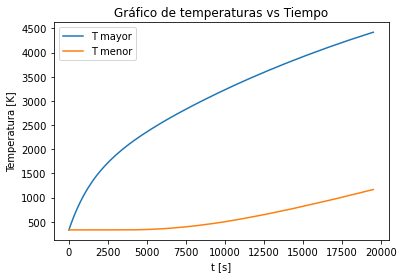

In [10]:
temperaturas = []
temp_ini = np.full((5,17),0)
temp_ini
for i in range(0,5):
    for j in range(0,17):
        temp_ini[i,j] = tini
        
for i in range(5,12):
    temp_ini[0,i] = 0
for i in range(6,11):
    temp_ini[1,i] = 0
for i in range(7,10):
    temp_ini[2,i] = 0
for i in range(8,9):
    temp_ini[3,i] = 0
temperaturas.insert(0,temp_ini)


for m in range(0,Iteraciones):

    #Avanzamos 150 segundos por iteración
    temp_prima = np.full((5,17),0)
    #Nodo A
    temp_prima[0,0] = ((temperaturas[m][0,0])*(1-(2*tao)-((2*tao*h*deltax**2)/k*deltay)-((2*tao*(deltax**2))/(deltay**2)))) + ((2*tao)*(temperaturas[m][0,1]+((tinf*h*(deltax**2))/(k*deltay))+(temperaturas[m][1,0]*((deltax**2)/(deltay**2)))))
    #Nodo A'
    temp_prima[0,16] = ((temperaturas[m][0,16])*(1-(2*tao)-((2*tao*h*deltax**2)/k*deltay)-((2*tao*(deltax**2))/(deltay**2)))) + ((2*tao)*(temperaturas[m][0,15]+((tinf*h*(deltax**2))/(k*deltay))+(temperaturas[m][1,16]*((deltax**2)/(deltay**2)))))
    #Nodos B,C,D
    for i in range(0,3):
        temp_prima[0,(i+1)] = (temperaturas[m][0,(i+1)]*(1-(2*tao)-((2*tao*h*deltax**2)/k*deltay)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][0,i]+((2*tinf*h*(deltax**2))/(k*deltay))+(2*temperaturas[m][1,(i+1)]*((deltax**2)/(deltay**2)))+temperaturas[m][0,(i+2)]))
    #Nodos B',C',D'
    for i in range(0,3):
        temp_prima[0,(i+13)] = (temperaturas[m][0,(i+13)]*(1-(2*tao)-((2*tao*h*deltax**2)/k*deltay)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][0,(i+12)]+((2*tinf*h*(deltax**2))/(k*deltay))+(2*temperaturas[m][1,(i+13)]*((deltax**2)/(deltay**2)))+temperaturas[m][0,(i+14)]))
    #Nodo E
    temp_prima[0,4] = (temperaturas[m][0,4]*(1-((4/3)*tao)-(((8/3)*tao*deltax**2)/(deltay))-(((4/3)*tao*deltax)/(np.cos(ang)*deltay))-(((4/3)*tao*h*(deltax**2))/(k*deltay)))) + (((4/3)*tao)*(temperaturas[m][0,3]+((tinf*h*(deltax**2))/(k*deltay))+(2*temperaturas[m][1,4]*((deltax**2)/(deltay)))+((deltax*temperaturas[m][0,12])/(deltay*np.cos(ang)))))
    #Nodo E'
    temp_prima[0,12] = (temperaturas[m][0,12]*(1-((4/3)*tao)-(((8/3)*tao*deltax**2)/(deltay))-(((4/3)*tao*deltax)/(np.cos(ang)*deltay))-(((4/3)*tao*h*(deltax**2))/(k*deltay)))) + (((4/3)*tao)*(temperaturas[m][0,13]+((tinf*h*(deltax**2))/(k*deltay))+(2*temperaturas[m][1,12]*((deltax**2)/(deltay)))+((deltax*temperaturas[m][0,4])/(deltay*np.cos(ang)))))
    #Nodos F,L,S
    for i in range(0,3):
        temp_prima[(i+1),0] = (temperaturas[m][(i+1),0]*(1-tao-((tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][(i+1),1]+(temperaturas[m][i,0]*((deltax**2)/(2*(deltay**2))))+(temperaturas[m][(i+2),0]*((deltax**2)/(2*(deltay**2))))))
    #Nodos F',L',S
    for i in range(0,3):
        temp_prima[(i+1),16] = (temperaturas[m][(i+1),16]*(1-tao-((tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][(i+1),15]+(temperaturas[m][i,16]*((deltax**2)/(2*(deltay**2))))+(temperaturas[m][(i+2),16]*((deltax**2)/(2*(deltay**2))))))
    #Nodos G,H,I,J
    for i in range(0,4):
        temp_prima[1,(i+1)] = (temperaturas[m][1,(i+1)]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][1,i] + temperaturas[m][1,(i+2)]+((temperaturas[m][0,(i+1)]+temperaturas[m][2,(i+1)])*((deltax**2)/(deltay**2)))))
    #Nodos G',H',I',J'
    for i in range(0,4):
        temp_prima[1,(i+12)] = (temperaturas[m][1,(i+12)]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][1,(i+11)] + temperaturas[m][1,(i+13)]+((temperaturas[m][0,(i+12)]+temperaturas[m][2,(i+12)])*((deltax**2)/(deltay**2)))))
    #Nodos M,N,O,P,Q
    for i in range(0,5):
        temp_prima[2,(i+1)] = (temperaturas[m][2,(i+1)]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][2,i] + temperaturas[m][2,(i+2)]+((temperaturas[m][1,(i+1)]+temperaturas[m][3,(i+1)])*((deltax**2)/(deltay**2)))))
    #Nodos M',N',O',P',Q'
    for i in range(0,5):
        temp_prima[2,(i+11)] = (temperaturas[m][2,(i+11)]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][2,(i+10)] + temperaturas[m][2,(i+12)]+((temperaturas[m][1,(i+11)]+temperaturas[m][3,(i+11)])*((deltax**2)/(deltay**2)))))
    #Nodos T,U,V,W,X,Y
    for i in range(0,6):
        temp_prima[3,(i+1)] = (temperaturas[m][3,(i+1)]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][3,i] + temperaturas[m][3,(i+2)]+((temperaturas[m][2,(i+1)]+temperaturas[m][4,(i+1)])*((deltax**2)/(deltay**2)))))
    #Nodos T',U',V',W',X',Y'
    for i in range(0,6):
        temp_prima[3,(i+10)] = (temperaturas[m][3,(i+10)]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2)))) + (tao*(temperaturas[m][3,(i+9)] + temperaturas[m][3,(i+11)]+((temperaturas[m][2,(i+10)]+temperaturas[m][4,(i+10)])*((deltax**2)/(deltay**2)))))
    #Nodo K
    temp_prima[1,5] = (temperaturas[m][1,5]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2))-((2*tao*deltax)/(np.cos(ang)*deltay)))) + ((2*tao)*(temperaturas[m][1,4]+(temperaturas[m][2,5]*((deltax**2)/(deltay**2)))+((temperaturas[m][1,11]*deltax)/(np.cos(ang)*deltay))))
    #Nodo K'
    temp_prima[1,11] = (temperaturas[m][1,11]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2))-((2*tao*deltax)/(np.cos(ang)*deltay)))) + ((2*tao)*(temperaturas[m][1,12]+(temperaturas[m][2,11]*((deltax**2)/(deltay**2)))+((temperaturas[m][1,5]*deltax)/(np.cos(ang)*deltay))))
    #Nodo R
    temp_prima[2,6] = (temperaturas[m][2,6]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2))-((2*tao*deltax)/(np.cos(ang)*deltay)))) + ((2*tao)*(temperaturas[m][2,5]+(temperaturas[m][3,6]*((deltax**2)/(deltay**2)))+((temperaturas[m][2,10]*deltax)/(np.cos(ang)*deltay))))                      
    #Nodo R'
    temp_prima[2,10] = (temperaturas[m][2,10]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2))-((2*tao*deltax)/(np.cos(ang)*deltay)))) + ((2*tao)*(temperaturas[m][2,11]+(temperaturas[m][3,10]*((deltax**2)/(deltay**2)))+((temperaturas[m][2,6]*deltax)/(np.cos(ang)*deltay))))
    #Nodo Z
    temp_prima[3,7] = (temperaturas[m][3,7]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2))-((2*tao*deltax)/(np.cos(ang)*deltay)))) + ((2*tao)*(temperaturas[m][3,6]+(temperaturas[m][4,7]*((deltax**2)/(deltay**2)))+((temperaturas[m][3,9]*deltax)/(np.cos(ang)*deltay))))
    #Nodo Z'
    temp_prima[3,9] = (temperaturas[m][3,9]*(1-(2*tao)-((2*tao*(deltax**2))/(deltay**2))-((2*tao*deltax)/(np.cos(ang)*deltay)))) + ((2*tao)*(temperaturas[m][3,10]+(temperaturas[m][4,9]*((deltax**2)/(deltay**2)))+((temperaturas[m][3,7]*deltax)/(np.cos(ang)*deltay))))
    #Nodo AA
    temp_prima[4,0] = (temperaturas[m][4,0]) + ((2*tao)*((((deltax**2)*(temperaturas[m][3,0]-temperaturas[m][4,0]))/(deltay**2)) + (temperaturas[m][4,1]-temperaturas[m][4,0]) + (((tinf-temperaturas[m][4,0])*h*(deltax**2))/(k*deltay)) + ((((talrd**4)-(temperaturas[m][4,0]**4))*alpha*sigma*(deltax**2))/(k*deltay))))      
    #Nodo AA'
    temp_prima[4,16] = (temperaturas[m][4,16]*(1-(2*tao)-(2*tao*(deltax**2)/(deltay**2)))) + ((2*tao)*(((temperaturas[m][3,16]*(deltax**2))/(deltay**2))+(temperaturas[m][4,15]))) 
    #Nodo AB,AC,AD,AE,AF,AG,AH
    for i in range(0,7):
        temp_prima[4,i+1] = (temperaturas[m][4,i+1]) + (tao*((((deltax**2)*2*(temperaturas[m][3,i+1]-temperaturas[m][4,i+1]))/(deltay**2)) + (temperaturas[m][4,i]-temperaturas[m][4,i+1]) + (temperaturas[m][4,i+2]-temperaturas[m][4,i+1]) + (((tinf-temperaturas[m][4,i+1])*2*h*(deltax**2))/(k*deltay)) + ((((talrd**4)-(temperaturas[m][4,i+1]**4))*2*alpha*sigma*(deltax**2))/(k*deltay))))
    #Nodos AB',AC',AD',AE',AF',AG',AH'
    for i in range(0,7):
        temp_prima[4,(i+9)] = (temperaturas[m][4,(i+9)]*(1-(2*tao)-(2*tao*(deltax**2)/(deltay**2)))) + ((tao)*((temperaturas[m][4,(i+10)])+((2*temperaturas[m][3,(i+9)]*deltax**2)/(deltay**2))+(temperaturas[m][4,(i+8)])))
    ##temp_prima[4,15] = (temperaturas[m][4,15]*(1-(2*tao)-(2*tao*(deltax**2)/(deltay**2)))) + ((tao)*((temperaturas[m][4,16])+((2*temperaturas[m][3,15]*deltax**2)/(deltay**2))+(temperaturas[m][4,14])))
    #Nodo AI
    temp_prima[4,8] = (temperaturas[m][4,8]) + ((4*tao)*((temperaturas[m][4,7]-temperaturas[m][4,8]) + ((tinf-temperaturas[m][4,8])*h*(deltax**2))/(k*deltay)) + ((((talrd**4)-(temperaturas[m][4,8]**4))*alpha*sigma*(deltax**2))/(k*deltay))+(((temperaturas[m][4,9]-temperaturas[m][4,8])*deltax)/(2*deltay*(np.cos(ang)))))

    temperaturas.insert((m+1),temp_prima)

temp_menor = []
for i in range(0,Iteraciones):
    temp_menor.insert(i,temperaturas[i][4,16])
    
temp_mayor = []
for i in range(0,Iteraciones):
    temp_mayor.insert(i,temperaturas[i][0,0])
    
tiempos = []
for i in range(0,Iteraciones):
    tiempos.insert(i,(i*deltat))

    
datos = {'T mayor': temp_mayor,'T menor':temp_menor}
df= pd.DataFrame(datos)
plt.figure()
plt.plot(tiempos,df)
plt.legend(datos, loc='best')
plt.title("Gráfico de temperaturas vs Tiempo")
plt.xlabel('t [s]')
plt.ylabel('Temperatura [K]')


